# Explore here

In [1]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(r'../data/raw/River_Arno.csv', index_col='Date', parse_dates=True, date_format=r'%d/%m/%Y')
## data available in https://www.kaggle.com/competitions/acea-water-prediction/data?select=River_Arno.csv

In [3]:
raw_df

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
Date,,,,,,,,,,,,,,,,
1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1998-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
1998-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
1998-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
1998-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
2020-06-27,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21
2020-06-28,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30


In [4]:
raw_df['Hydrometry_Nave_di_Rosano'].isnull().sum()

48

In [5]:
from datetime import datetime

In [6]:
gt_2010_mask = (raw_df.index>=datetime(2010,1,1))

In [7]:
ts = raw_df.loc[gt_2010_mask, 'Hydrometry_Nave_di_Rosano'].copy()
ts.interpolate(method='linear', inplace=True)
ts = ts.resample('W').mean()


In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

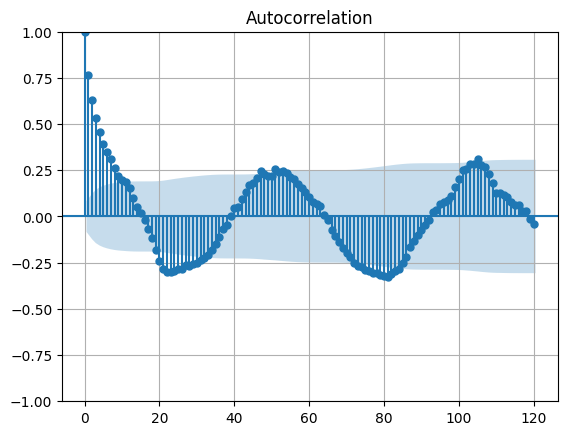

In [9]:
plot_acf(ts, lags=120)
plt.grid(True)

plt.show()

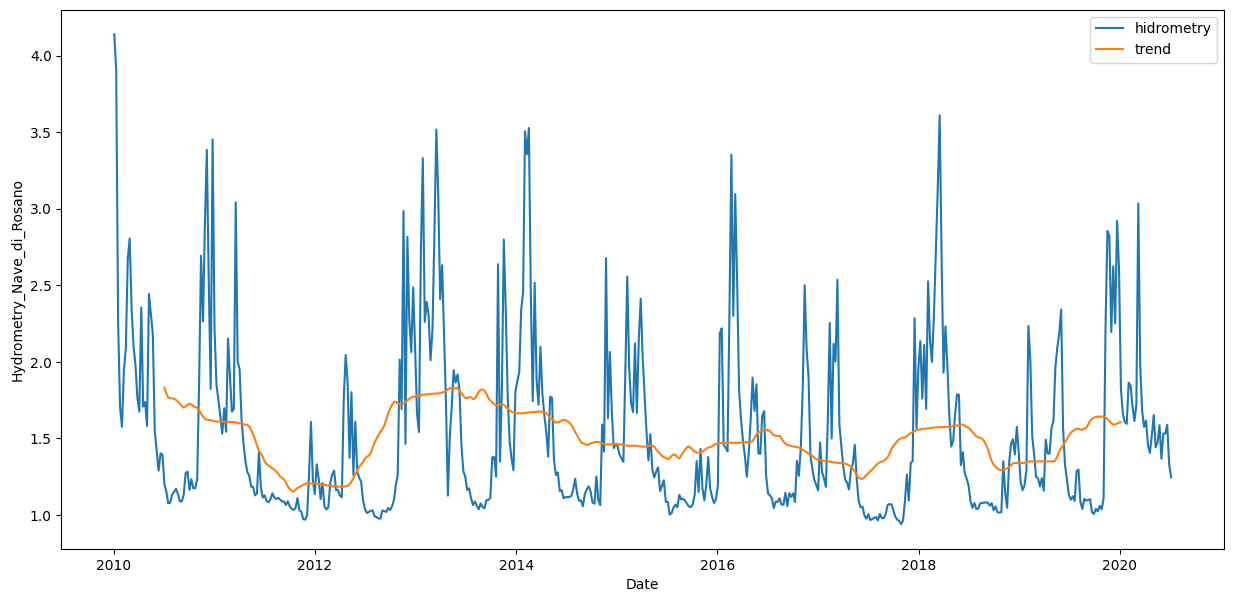

In [10]:
decomposition = seasonal_decompose(ts, period = 52)

plt.figure(figsize=(15,7))
sns.lineplot(ts, label='hidrometry')
sns.lineplot(decomposition.trend, label='trend')
plt.show()

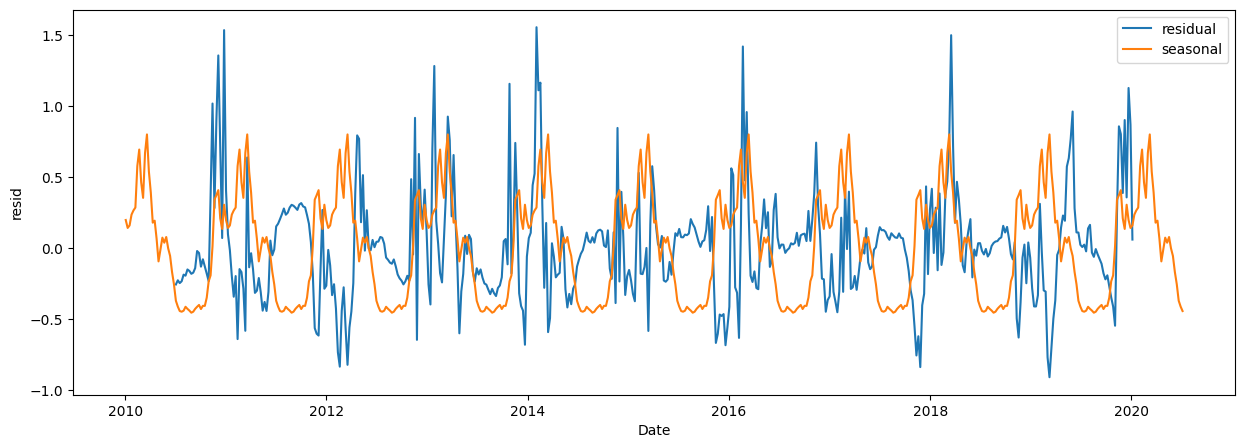

In [11]:
plt.figure(figsize=(15,5))
sns.lineplot(decomposition.resid, label='residual')
sns.lineplot(decomposition.seasonal, label='seasonal')
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

print(f'Dickey-Fuller test p-value: {adfuller(ts)[1]}')

Dickey-Fuller test p-value: 1.4101742819603746e-11


In [13]:
from pmdarima import auto_arima

In [45]:
model = auto_arima(ts, seasonal=True, m=52, trace=True, random_state=42)


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.wa

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=31.24 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=938.815, Time=0.12 sec


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=425.396, Time=12.77 sec


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=646.322, Time=7.10 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2097.554, Time=0.04 sec


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=423.923, Time=0.49 sec


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=425.347, Time=9.33 sec


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=17.20 sec


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=416.865, Time=0.34 sec


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,0)[52] intercept   : AIC=417.914, Time=17.08 sec


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,1)[52] intercept   : AIC=417.877, Time=7.97 sec


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=24.90 sec


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[52] intercept   : AIC=418.829, Time=0.67 sec


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=418.820, Time=0.83 sec


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=416.867, Time=0.34 sec


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[52] intercept   : AIC=420.851, Time=0.56 sec
 ARIMA(2,0,0)(0,0,0)[52]             : AIC=449.687, Time=0.21 sec

Best model:  ARIMA(2,0,0)(0,0,0)[52] intercept
Total fit time: 131.320 seconds


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


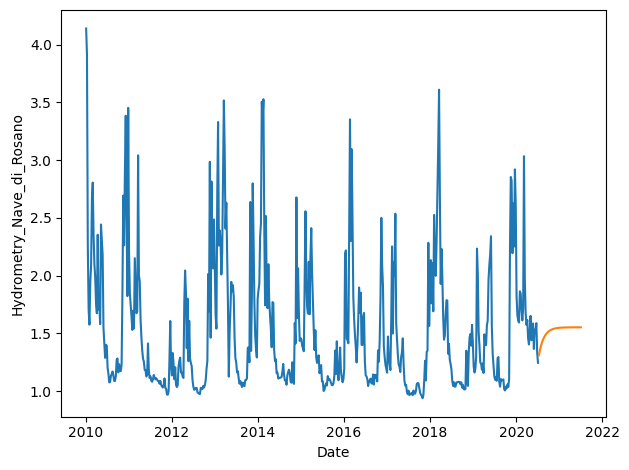

In [47]:
predict = model.predict(52)
sns.lineplot(data=ts)
sns.lineplot(data=predict)

plt.tight_layout()
plt.show()

In [14]:
from neuralprophet import NeuralProphet

c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\lightning_fabric\__init__.py:29: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)


In [15]:
ts_np = pd.DataFrame(raw_df['Hydrometry_Nave_di_Rosano'].copy())
ts_np.interpolate(method='linear', inplace=True)
ts_np.reset_index(names='ds', inplace=True)
ts_np.rename({'Hydrometry_Nave_di_Rosano':'y'}, axis=1, inplace=True)
ts_np


,ds,y
0,1998-01-01,1.82
1,1998-01-02,1.94
2,1998-01-03,2.11
3,1998-01-04,1.84
4,1998-01-05,1.88
...,...,...
8212,2020-06-26,1.34
8213,2020-06-27,1.21
8214,2020-06-28,1.30
8215,2020-06-29,1.19


In [ ]:
neural_model = NeuralProphet()
metrics = neural_model.fit(ts_np, freq='D')
pred_df = neural_model.make_future_dataframe(ts_np, periods=365)
pred_df = neural_model.predict(pred_df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


WARNING - (py.warnings._showwarnmsg) - c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  if df.groupby("ID").apply(lambda x: x.duplicated("ds").any()).any():

WARNING - (py.warnings._showwarnmsg) - c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequen

Finding best initial lr:   0%|          | 0/247 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\lightning_fabric\utilities\cloud_io.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for 

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.988% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\venv312\Lib\site-packages\neuralprophet\df_util

Predicting: 129it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [22]:
pred_df

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2020-07-01,None,1.093967,1.415942,-0.323627,0.001651
1,2020-07-02,None,1.089162,1.415910,-0.329086,0.002338
2,2020-07-03,None,1.093980,1.415878,-0.334271,0.012373
3,2020-07-04,None,1.071925,1.415845,-0.339243,-0.004678
4,2020-07-05,None,1.043123,1.415813,-0.343978,-0.028712
...,...,...,...,...,...,...
360,2021-06-26,None,1.108755,1.404313,-0.290846,-0.004712
361,2021-06-27,None,1.077909,1.404281,-0.297674,-0.028698
362,2021-06-28,None,1.105958,1.404248,-0.304206,0.005916
363,2021-06-29,None,1.104874,1.404216,-0.310486,0.011145


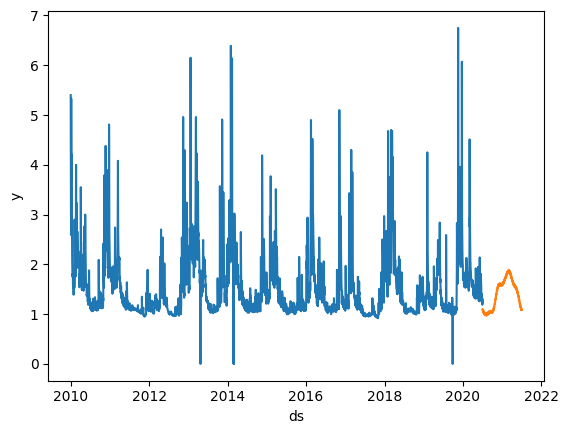

In [24]:
sns.lineplot(ts_np[gt_2010_mask], x='ds', y='y')
sns.lineplot(pred_df, x='ds',y='yhat1')
plt.show()